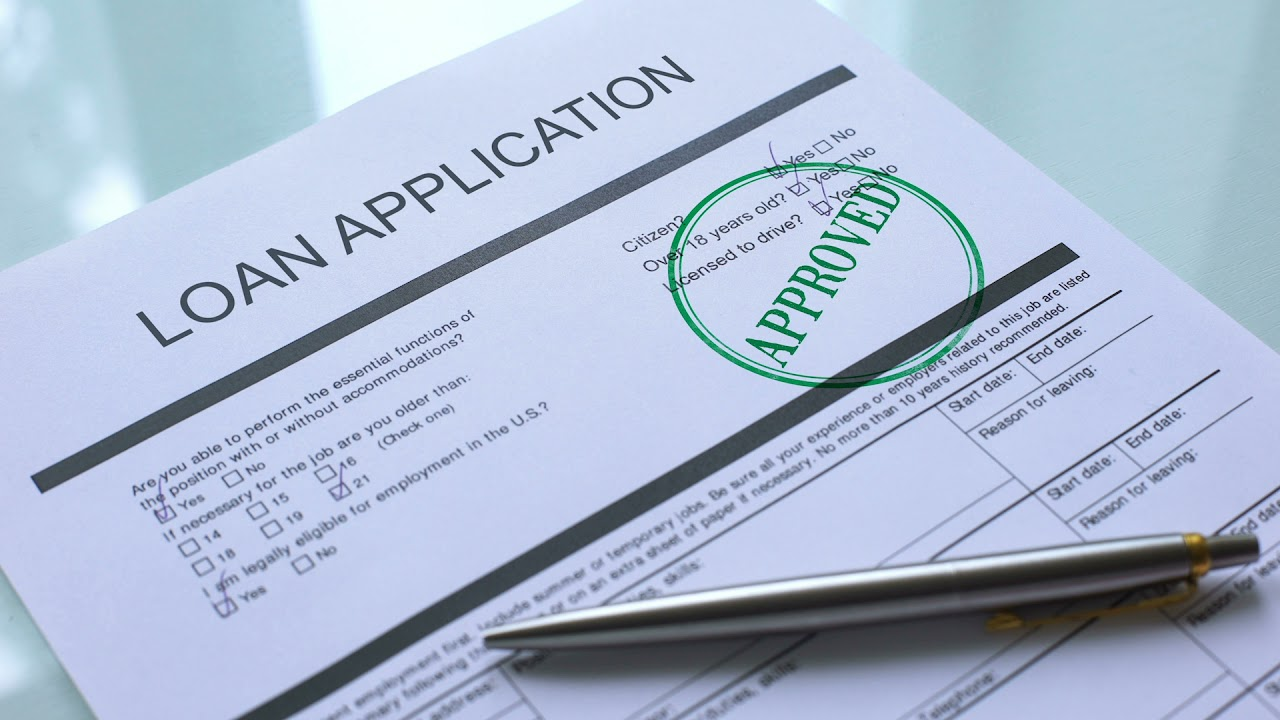

# Loan Approval Prediction


## Preprocessing and Cleaning data

In [ ]:
# Install the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Load the training data
df=pd.read_csv("train.csv")
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [ ]:
# Let's look at the missing data
df.isnull().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,182
loan_amnt,0
loan_int_rate,0
loan_percent_income,0
cb_person_default_on_file,0


In [ ]:
# Descriptive statistics
df.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,58644.000000,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


In [ ]:
# Validation checks
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [ ]:
df["loan_status"].value_counts()

,count
loan_status,
0,50288
1,8349


In [ ]:
len(df[df["person_age"]==123])

1

In [ ]:
len(df[df["person_emp_length"]==123])

2

In [ ]:
# Excluding outliers
df=df[df["person_age"]!=123]
df=df[df["person_emp_length"]!=123]

In [ ]:
# Before going further let's encode the categorical variables

# Extracting categorical features
cat_features = df.select_dtypes(include=['object']).columns
cat_features

Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')

##### Since loan grades have a clear ordinal structure (A is better than B, and so on), ordinal encoding is typically the best approach here. It preserves the natural order and is simple to implement without adding extra complexity to the model.

In [ ]:
# Ordinal encoding for "loan_grade" column
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
df['loan_grade'] = encoder.fit_transform(df[['loan_grade']])


In [ ]:
df["loan_grade"].value_counts()

,count
loan_grade,
0.0,20984
1.0,20398
2.0,11036
3.0,5033
4.0,1009
5.0,149
6.0,33


In [ ]:
cat_features=cat_features.drop("loan_grade")

In [ ]:
cat_features

Index(['person_home_ownership', 'loan_intent', 'cb_person_default_on_file'], dtype='object')

In [ ]:
df_new=pd.get_dummies(df,columns=cat_features, drop_first=True)
df_new=df_new.drop("id",axis=1)
df_new.head()


,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y
0,37,35000,0.0,1.0,6000,11.49,0.17,14,0,False,False,True,True,False,False,False,False,False
1,22,56000,6.0,2.0,4000,13.35,0.07,2,0,False,True,False,False,False,True,False,False,False
2,29,28800,8.0,0.0,6000,8.90,0.21,10,0,False,True,False,False,False,False,True,False,False
3,30,70000,14.0,1.0,12000,11.11,0.17,5,0,False,False,True,False,False,False,False,True,False
4,22,60000,2.0,0.0,6000,6.92,0.10,3,0,False,False,True,False,False,True,False,False,False


In [ ]:
# Delete the row with index "id"
df_new.drop("id",axis=1,inplace=True)
# Correlation
df_new.corr()["loan_status"].sort_values(ascending=False)


,loan_status
loan_status,1.000000
loan_grade_2.0,0.395563
loan_percent_income,0.378226
loan_int_rate,0.338904
person_home_ownership_RENT,0.239669
cb_person_default_on_file_Y,0.186875
loan_amnt,0.144897
loan_intent_MEDICAL,0.049050
loan_intent_HOMEIMPROVEMENT,0.031074
person_home_ownership_OTHER,0.002920


<Axes: >

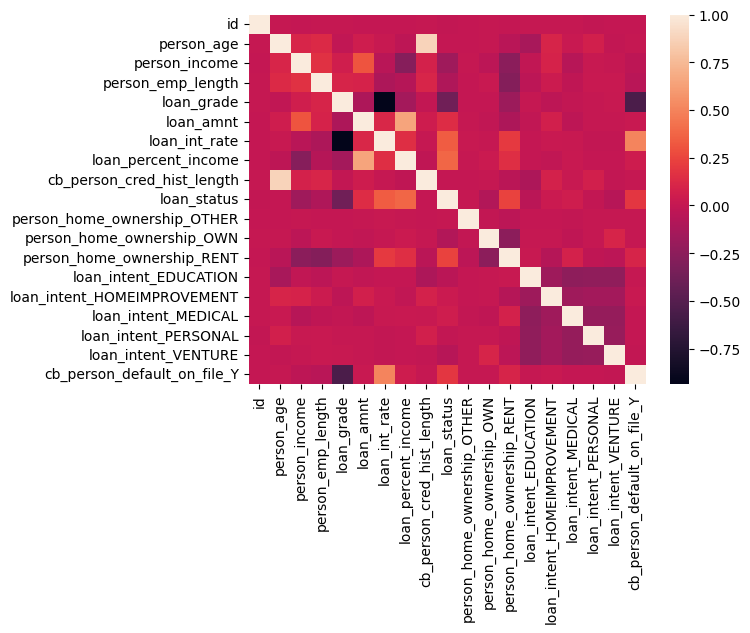

In [ ]:
# Heatmap for the features
sns.heatmap(df_new.corr())

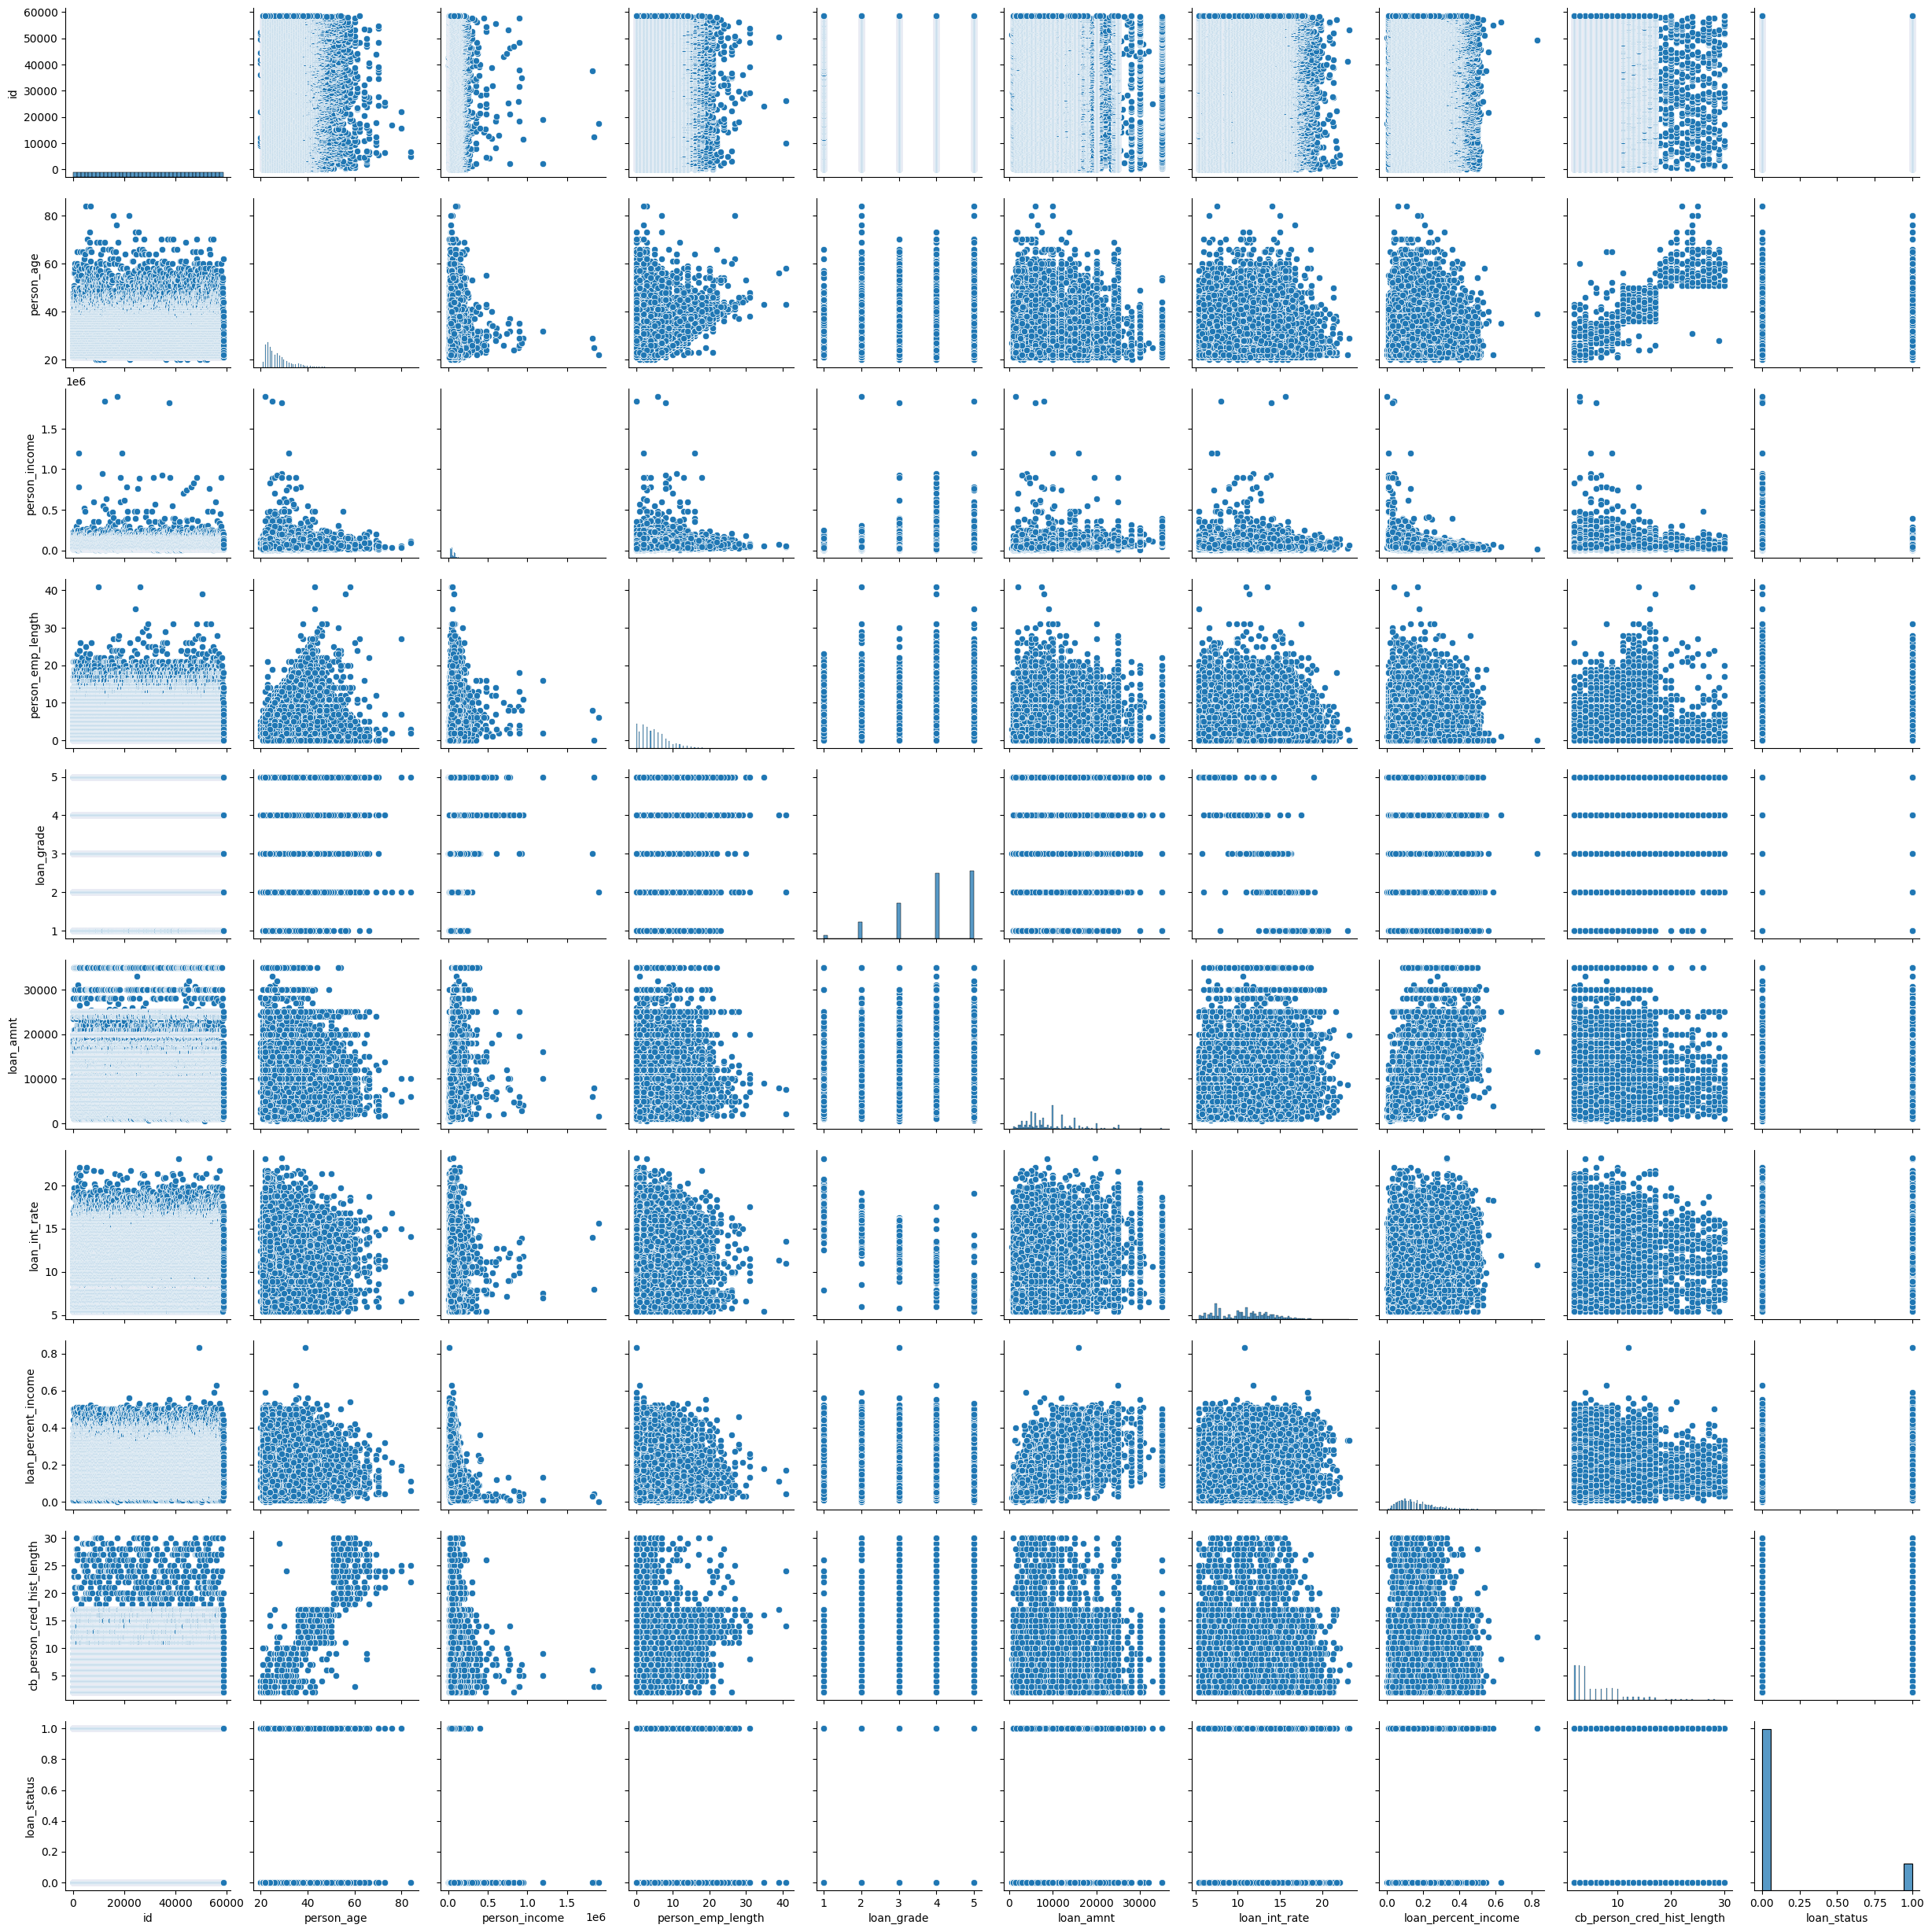

In [ ]:
sns.pairplot(df)

Text(0.5, 1.0, 'Loan Intent vs Loan Status')

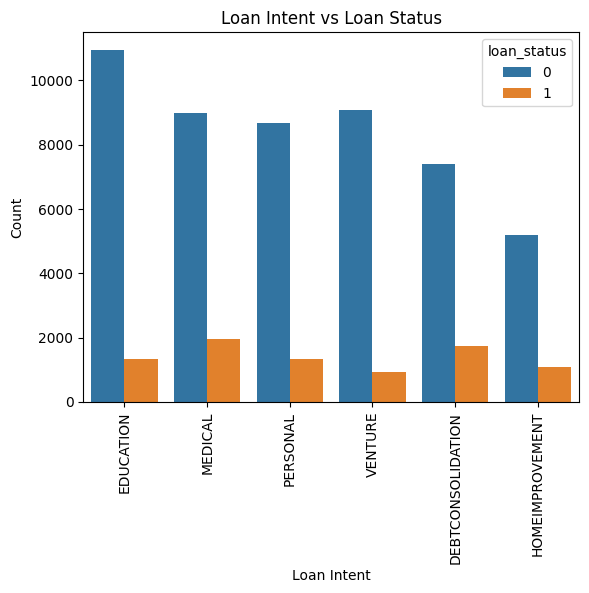

In [ ]:
sns.countplot(x="loan_intent",hue="loan_status",data=df)
plt.xticks(rotation=90)
plt.xlabel("Loan Intent")
plt.ylabel("Count")
plt.title("Loan Intent vs Loan Status")

([0], [Text(0, 0, '')])

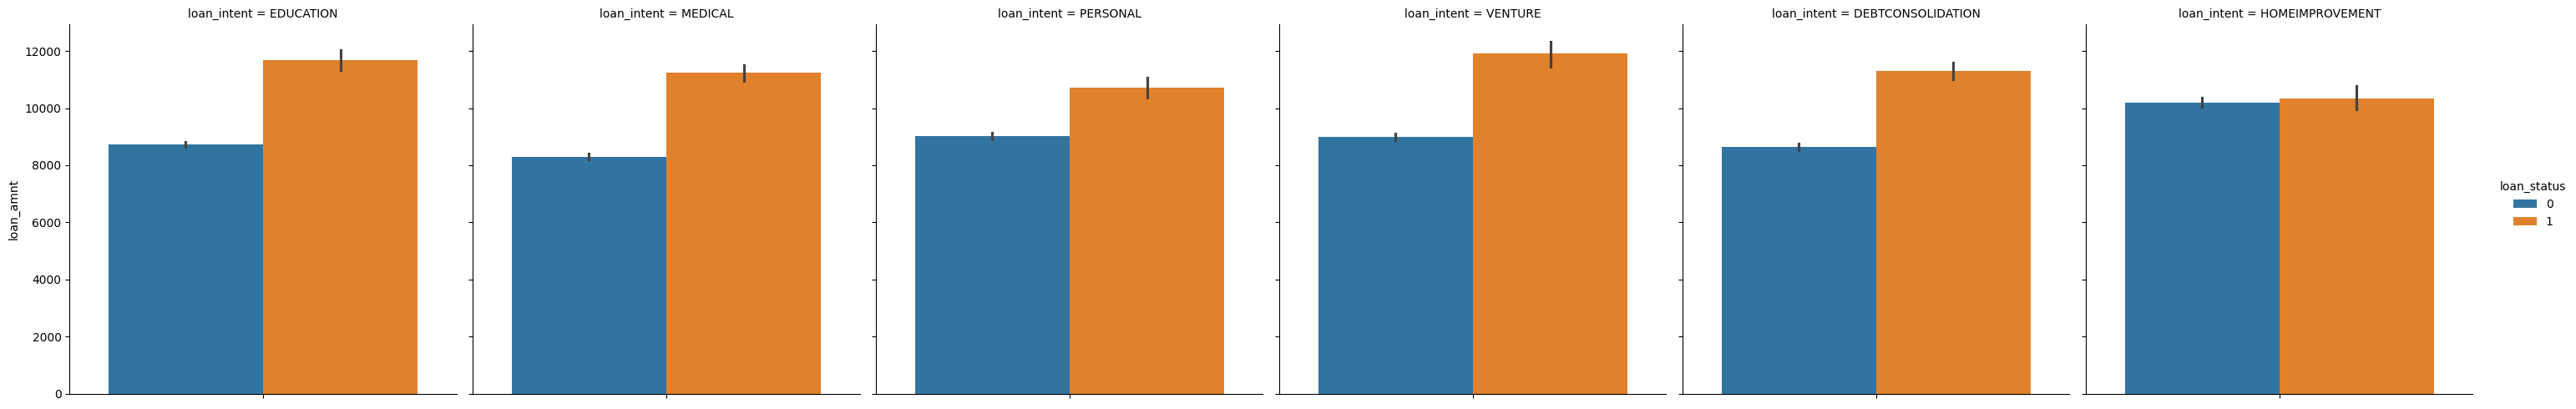

In [ ]:
sns.catplot(col="loan_intent",y="loan_amnt",hue="loan_status",data=df,kind="bar")
plt.xticks(rotation=90)

In [ ]:
df.columns

Index(['id', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status'],
      dtype='object')

(0.0, 400000.0)

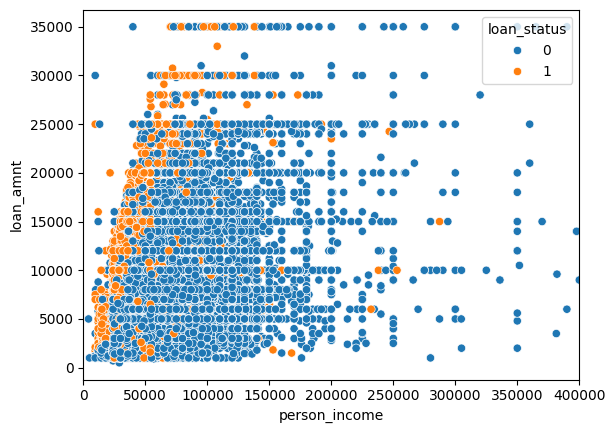

In [ ]:
sns.scatterplot(x="person_income",y="loan_amnt", data=df,hue="loan_status")
plt.xlim(0,400000)

In [ ]:
#Excluding all values where income is higher than 1000000

df=df[df["person_income"]<1000000]
df_new=df_new[df_new["person_income"]<1000000]

<Axes: xlabel='cb_person_default_on_file', ylabel='count'>

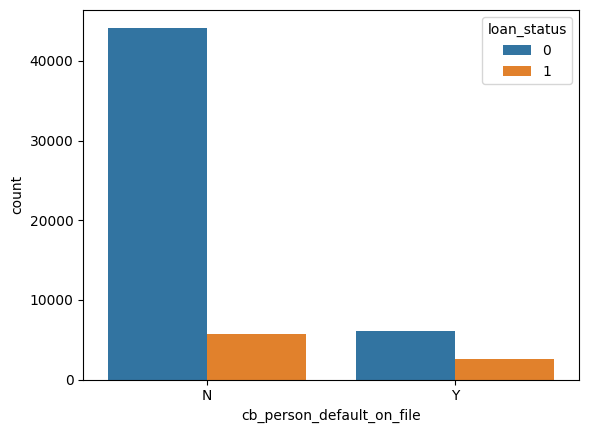

In [ ]:
sns.countplot(x="cb_person_default_on_file",hue="loan_status",data=df)

## Building ML models

In [ ]:
# Let's start with building couple single models
# But firstly I will divide the dataset to training and validation sets

from sklearn.model_selection import train_test_split
X=df_new.drop("loan_status",axis=1)
y=df_new["loan_status"]
X_train,X_valid,y_train,y_valid=train_test_split(X,y,test_size=0.2,random_state=42)

### Logistic Regression

In [ ]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, matthews_corrcoef
log_reg=LogisticRegression(class_weight="balanced")

log_reg.fit(X_train,y_train)
y_pred=log_reg.predict(X_valid)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#GridSearchCV
param_grid = {
    'penalty': ['l1', 'l2', 'none'],
    'C': [0.01, 0.1, 1, 10, 100],
    'max_iter': [100, 200, 300, 500],
    'class_weight': ['balanced']
}

#Grid Search CV
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
y_predCV=log_reg.predict(X_valid)
print(accuracy_score(y_valid,y_predCV))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

0.881660840651377


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Evaluation function
def evaluate_model(model,X_valid=X_valid):
    y_pred = model.predict(X_valid)
    accuracy = accuracy_score(y_valid, y_pred)
    confusion = confusion_matrix(y_valid, y_pred)
    classification_rep = classification_report(y_valid, y_pred)
    mcc = matthews_corrcoef(y_valid, y_pred)
    print("Accuracy:", accuracy)
    print("MCC:", mcc)
    print("Classification Report:\n", classification_rep)


In [ ]:
evaluate_model(log_reg)

Accuracy: 0.7483799454297408
MCC: 0.4139127272858618
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.74      0.83     10045
           1       0.34      0.83      0.49      1683

    accuracy                           0.75     11728
   macro avg       0.65      0.78      0.66     11728
weighted avg       0.87      0.75      0.78     11728



### SVM Model

In [ ]:
# SVM
from sklearn.svm import SVC
svm_model=SVC(class_weight="balanced")
svm_model.fit(X_train,y_train)
y_pred_svm=svm_model.predict(X_valid)

In [ ]:
evaluate_model(svm_model)

Accuracy: 0.7648362892223738
MCC: 0.32827105127226824
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.79      0.85     10045
           1       0.33      0.63      0.43      1683

    accuracy                           0.76     11728
   macro avg       0.63      0.71      0.64     11728
weighted avg       0.84      0.76      0.79     11728



In [ ]:
# Scaling data for possible better performance:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_valid_scaled=scaler.transform(X_valid)

In [ ]:
svm_model_new=SVC(class_weight="balanced")
svm_model_new.fit(X_train_scaled,y_train)
y_pred_svm_new=svm_model_new.predict(X_valid_scaled)

In [ ]:
evaluate_model(svm_model_new,X_valid=X_valid_scaled, y_pred=y_pred_svm_new)

Accuracy: 0.908168485675307
MCC: 0.666295959825165
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.93      0.95     10045
           1       0.64      0.80      0.71      1683

    accuracy                           0.91     11728
   macro avg       0.81      0.86      0.83     11728
weighted avg       0.92      0.91      0.91     11728



##### With scaling data and using balanced model I achieved a better result

### XGBoost

In [ ]:
# XGBoost model
import xgboost as xgb
xgb_model=xgb.XGBClassifier(class_weight="balanced")
xgb_model.fit(X_train_scaled,y_train)
y_pred_xgb=xgb_model.predict(X_valid_scaled)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [00:30:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
evaluate_model(xgb_model,X_valid=X_valid_scaled, y_pred=y_pred_xgb)

Accuracy: 0.9511425648021828
MCC: 0.7899437675808454
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97     10045
           1       0.91      0.73      0.81      1683

    accuracy                           0.95     11728
   macro avg       0.93      0.86      0.89     11728
weighted avg       0.95      0.95      0.95     11728



### Random Forest

In [ ]:
#Random forest model
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier(class_weight="balanced")
rf_model.fit(X_train_scaled,y_train)
y_pred_rf=rf_model.predict(X_valid_scaled)

In [ ]:
evaluate_model(rf_model,X_valid=X_valid_scaled, y_pred=y_pred_rf)

Accuracy: 0.950630968622101
MCC: 0.786453463905004
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     10045
           1       0.93      0.71      0.80      1683

    accuracy                           0.95     11728
   macro avg       0.94      0.85      0.89     11728
weighted avg       0.95      0.95      0.95     11728



## Stacked model

In [ ]:
# Stacking all the previous models and feeding the predictions to the meta learner as input
# Stacking classifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier


estimators = [
    ('log_reg', LogisticRegression()),
    ('svm', SVC(class_weight="balanced")),
    ('xgb', xgb.XGBClassifier(class_weight="balanced")),
    ('rf', RandomForestClassifier(class_weight="balanced", n_estimators=200))]

from sklearn.ensemble import StackingClassifier
stacker = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(), stack_method='predict')


NameError: name 'LogisticRegression' is not defined

In [ ]:
stacker.fit(X_train_scaled,y_train)
y_pred_stack=stacker.predict(X_valid_scaled)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:46:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:50:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:50:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:50:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
evaluate_model(stacker,X_valid=X_valid_scaled)

Accuracy: 0.951568894952251
MCC: 0.79174997721282
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97     10045
           1       0.91      0.73      0.81      1683

    accuracy                           0.95     11728
   macro avg       0.93      0.86      0.89     11728
weighted avg       0.95      0.95      0.95     11728



### Additional Feature Engineering

<Axes: xlabel='person_age', ylabel='Count'>

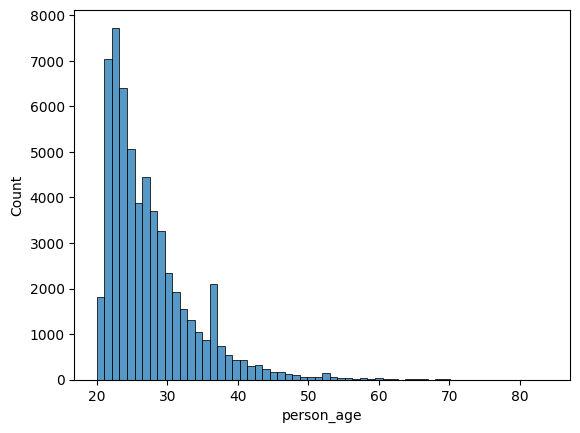

In [ ]:
sns.histplot(df["person_age"],bins=60)

<Axes: xlabel='person_emp_length', ylabel='Count'>

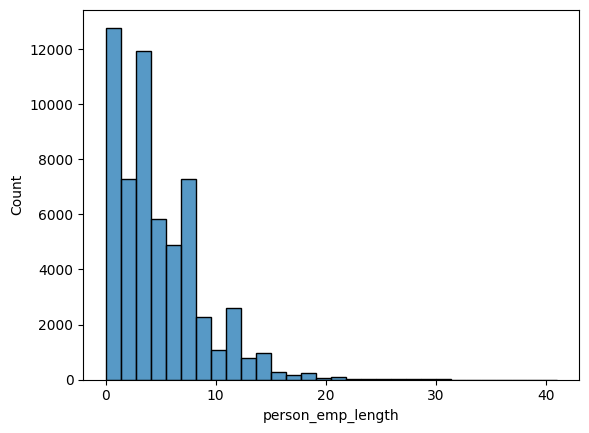

In [ ]:
sns.histplot(df["person_emp_length"],bins=30)

In [ ]:
# Create a new feature "exp_level" based on "person_emp_length"
bins = [0, 5, 10, 15, 20, 40]
labels = ['0-5', '6-10', '10-15', '15-20', '20-40']
df1['exp_level'] = pd.cut(df1['person_emp_length'], bins=bins, labels=labels, include_lowest=True)

In [ ]:
df1=df1.drop("id", axis=1)
df1=df1.drop("person_age", axis=1)
df1=df1.drop("person_emp_length", axis=1)

In [ ]:
df1=pd.get_dummies(df1)

In [ ]:
df1

,person_income,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,...,age_bracket_26-30,age_bracket_31-35,age_bracket_36-40,age_bracket_41-50,age_bracket_51-100,exp_level_0-5,exp_level_6-10,exp_level_10-15,exp_level_15-20,exp_level_20-40
0,35000,1.0,6000,11.49,0.17,14,0,False,False,False,...,False,False,True,False,False,True,False,False,False,False
1,56000,2.0,4000,13.35,0.07,2,0,False,False,True,...,False,False,False,False,False,False,True,False,False,False
2,28800,0.0,6000,8.90,0.21,10,0,False,False,True,...,True,False,False,False,False,False,True,False,False,False
3,70000,1.0,12000,11.11,0.17,5,0,False,False,False,...,True,False,False,False,False,False,False,True,False,False
4,60000,0.0,6000,6.92,0.10,3,0,False,False,False,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58640,120000,3.0,25000,15.95,0.21,10,0,True,False,False,...,False,True,False,False,False,True,False,False,False,False
58641,28800,2.0,10000,12.73,0.35,8,1,False,False,False,...,True,False,False,False,False,True,False,False,False,False
58642,44000,3.0,6800,16.00,0.15,2,1,False,False,False,...,False,False,False,False,False,False,True,False,False,False
58643,30000,0.0,5000,8.90,0.17,3,0,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [ ]:
X_1=df1.drop("loan_status",axis=1)
y_1=df1["loan_status"]
X_train_1,X_valid_1,y_train_1,y_valid_1=train_test_split(X_1,y_1,test_size=0.2,random_state=42)

In [ ]:
scaler=StandardScaler()
X_train_scaled_1=scaler.fit_transform(X_train_1)
X_valid_scaled_1=scaler.transform(X_valid_1)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier

estimators_1 = [
    ('log_reg', LogisticRegression(class_weight="balanced")),
    ('svm', SVC(class_weight="balanced")),
    ('xgb', xgb.XGBClassifier(class_weight="balanced")),
    ('rf', RandomForestClassifier(class_weight="balanced"))]

from sklearn.ensemble import StackingClassifier
stackerX = StackingClassifier(estimators=estimators_1, final_estimator=xgb.XGBClassifier(class_weight="balanced"), stack_method='predict')

In [ ]:
stackerX.fit(X_train_scaled_1,y_train_1)
y_pred_stack=stackerX.predict(X_valid_scaled_1)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:04:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:09:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:09:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:09:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:10:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "class_weight" } are not used.



In [ ]:
evaluate_model(stackerX,X_valid=X_valid_scaled_1)

Accuracy: 0.9484993178717599
MCC: 0.7781621615087503
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97     10045
           1       0.90      0.73      0.80      1683

    accuracy                           0.95     11728
   macro avg       0.93      0.86      0.89     11728
weighted avg       0.95      0.95      0.95     11728



### Final Prediction for Test set

In [ ]:
test=pd.read_csv("test.csv")
test.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4


In [ ]:
encoder = OrdinalEncoder()
test['loan_grade'] = encoder.fit_transform(test[['loan_grade']])

In [ ]:
df_test=test.drop("id",axis=1)
cat_features = df_test.select_dtypes(include=['object']).columns
cat_features

Index(['person_home_ownership', 'loan_intent', 'cb_person_default_on_file'], dtype='object')

In [ ]:
df_test=pd.get_dummies(df_test,columns=cat_features, drop_first=True)

In [ ]:
df_test.columns.sort_values()

Index(['cb_person_cred_hist_length', 'cb_person_default_on_file_Y',
       'loan_amnt', 'loan_grade', 'loan_int_rate', 'loan_intent_EDUCATION',
       'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
       'loan_intent_PERSONAL', 'loan_intent_VENTURE', 'loan_percent_income',
       'person_age', 'person_emp_length', 'person_home_ownership_OTHER',
       'person_home_ownership_OWN', 'person_home_ownership_RENT',
       'person_income'],
      dtype='object')

In [ ]:
df_new.columns.sort_values()

Index(['cb_person_cred_hist_length', 'cb_person_default_on_file_Y',
       'loan_amnt', 'loan_grade', 'loan_int_rate', 'loan_intent_EDUCATION',
       'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
       'loan_intent_PERSONAL', 'loan_intent_VENTURE', 'loan_percent_income',
       'loan_status', 'person_age', 'person_emp_length',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'person_income'],
      dtype='object')

In [ ]:
test_set=scaler.transform(df_test)

In [ ]:
y_pred_final=stacker.predict(test_set)

In [ ]:
submission=pd.DataFrame({"id":test["id"],"loan_status":y_pred_final})

In [ ]:
submission.head()

,id,loan_status
0,58645,1
1,58646,0
2,58647,1
3,58648,0
4,58649,0


In [ ]:
submission.to_csv("submission.csv",index=False)

### Stacker #2

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMRegressor

estimators_1 = [
    ('log_reg', LogisticRegression(class_weight="balanced")),
    ('svm', SVC(class_weight="balanced")),
    ('xgb', xgb.XGBClassifier(class_weight="balanced")),
    ('rf', RandomForestClassifier(class_weight="balanced")),
    ('lgbm', LGBMRegressor())]

from sklearn.ensemble import StackingClassifier
stacker_2 = StackingClassifier(estimators=estimators_1, final_estimator=xgb.XGBClassifier(), stack_method='predict')

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
stacker_2.fit(X_train_scaled,y_train)
y_pred_stack=stacker_2.predict_proba(X_valid_scaled)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [00:34:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007352 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 897
[LightGBM] [Info] Number of data points in the train set: 46909, number of used features: 17
[LightGBM] [Info] Start training from score 0.142105


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [00:38:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [00:38:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [00:38:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005042 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 898
[LightGBM] [Info] Number of data points in the train set: 37527, number of used features: 17
[LightGBM] [Info] Start training from score 0.142111
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004886 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 893
[LightGBM] [Info] Number of data points in the train set: 37527, number of used features: 17
[LightGBM] [Info] Start training from score 0.142111
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005317 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, matthews_corrcoef
evaluate_model(stacker_2,X_valid=X_valid_scaled)

Accuracy: 0.9514836289222374
MCC: 0.7908227362656375
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97     10045
           1       0.92      0.72      0.81      1683

    accuracy                           0.95     11728
   macro avg       0.94      0.86      0.89     11728
weighted avg       0.95      0.95      0.95     11728



### Stacker #3

In [ ]:
estimators_3 = [
    ('log_reg', LogisticRegression(class_weight="balanced")),
    ('svm', SVC(class_weight="balanced")),
    ('xgb', xgb.XGBClassifier(class_weight="balanced")),
    ('rf', RandomForestClassifier(class_weight="balanced", n_estimators=300)),
    ('lgbm', LGBMRegressor())]

stacker_3 = StackingClassifier(estimators=estimators_3, final_estimator=xgb.XGBClassifier(), stack_method='predict', cv=3)

In [ ]:
stacker_3.fit(X_train_scaled,y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [00:11:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006237 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 897
[LightGBM] [Info] Number of data points in the train set: 46909, number of used features: 17
[LightGBM] [Info] Start training from score 0.142105


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [00:14:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [00:14:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004149 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 892
[LightGBM] [Info] Number of data points in the train set: 31272, number of used features: 17
[LightGBM] [Info] Start training from score 0.142108
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004126 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 892
[LightGBM] [Info] Number of data points in the train set: 31273, number of used features: 17
[LightGBM] [Info] Start training from score 0.142103
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004143 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

StackingClassifier(cv=3,
                   estimators=[('log_reg',
                                LogisticRegression(class_weight='balanced')),
                               ('svm', SVC(class_weight='balanced')),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              class_weight='balanced',
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              e...
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=None,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=None, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 random_state=None, ...),
                   stack_method='predict')

In [ ]:
evaluate_model(stacker_3,X_valid=X_valid_scaled)

Accuracy: 0.9519099590723056
MCC: 0.7926584756180568
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97     10045
           1       0.92      0.72      0.81      1683

    accuracy                           0.95     11728
   macro avg       0.94      0.86      0.89     11728
weighted avg       0.95      0.95      0.95     11728



In [ ]:
test=pd.read_csv("test.csv")

In [ ]:
encoder = OrdinalEncoder()
test['loan_grade'] = encoder.fit_transform(test[['loan_grade']])

In [ ]:
df_test=test.drop("id",axis=1)
cat_features = df_test.select_dtypes(include=['object']).columns
cat_features

Index(['person_home_ownership', 'loan_intent', 'cb_person_default_on_file'], dtype='object')

In [ ]:
df_test=pd.get_dummies(df_test,columns=cat_features, drop_first=True)

In [ ]:
test_set=scaler.transform(df_test)

In [ ]:
y_pred_final=stacker_2.predict_proba(test_set)

In [ ]:
y_pred_final

array([[1.1176944e-02, 9.8882306e-01],
       [9.8537779e-01, 1.4622230e-02],
       [3.0619067e-01, 6.9380933e-01],
       ...,
       [9.9966782e-01, 3.3215591e-04],
       [7.0668530e-01, 2.9331467e-01],
       [3.4405053e-02, 9.6559495e-01]], dtype=float32)

In [ ]:
submission_8=pd.DataFrame({"id":test["id"],"loan_status":y_pred_final[:,1]})
submission_8.to_csv("submission_8.csv",index=False)

### 2-level Stacker

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score
import xgboost as xgb
from lightgbm import LGBMRegressor



### Level-0: Base Models
base_level_0 = [
    ('log_reg', LogisticRegression(class_weight="balanced")),
    ('svm', SVC(class_weight="balanced")),
    ('xgb', xgb.XGBClassifier()),
    ('rf', RandomForestClassifier(class_weight="balanced", n_estimators=300)),
    ('lgbm', LGBMRegressor())]


# First Stacking (Level-1) with base models as input
level_1_model = StackingClassifier(
    estimators=base_level_0,
    final_estimator=GradientBoostingClassifier(n_estimators=200, random_state=42),
    cv=5
)


### Level-1: Meta Models for First Layer of Stacking
base_level_1 = [
    ('stack1', level_1_model),
    ('svc_level_1', xgb.XGBClassifier())]

# Second Stacking (Level-2) with meta-models as input
level_2_model = StackingClassifier(
    estimators=base_level_1,
    final_estimator=xgb.XGBClassifier(),
    cv=3
)

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
### Train the 3-level Stacking Model
level_2_model.fit(X_train_scaled, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006921 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 896
[LightGBM] [Info] Number of data points in the train set: 52777, number of used features: 17
[LightGBM] [Info] Start training from score 0.142733
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005646 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 895
[LightGBM] [Info] Number of data points in the train set: 42221, number of used features: 17
[LightGBM] [Info] Start training from score 0.142725
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005646 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

StackingClassifier(cv=3,
                   estimators=[('stack1',
                                StackingClassifier(cv=5,
                                                   estimators=[('log_reg',
                                                                LogisticRegression(class_weight='balanced')),
                                                               ('svm',
                                                                SVC(class_weight='balanced')),
                                                               ('xgb',
                                                                XGBClassifier(base_score=None,
                                                                              booster=None,
                                                                              callbacks=None,
                                                                              colsample_bylevel=None,
                                                                              colsample_bynode=None,
                                                                              colsample_bytree=None,
                                                                              device=None,
                                                                              early_stopping_rounds=None,
                                                                              enab...
                                                 grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=None,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=None, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 random_state=None, ...))

In [ ]:
evaluate_model(level_2_model,X_valid=X_valid_scaled)

Accuracy: 0.9515771526001705
MCC: 0.7849040121228544
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      5049
           1       0.92      0.71      0.80       816

    accuracy                           0.95      5865
   macro avg       0.94      0.85      0.89      5865
weighted avg       0.95      0.95      0.95      5865



### AutoGluon

In [ ]:
X_train_scaled=pd.Dataframe(X_train_scaled, columns=X_train.columns)

array([[ 1.0719199 , -0.05557541, -0.69048601, ...,  2.20552897,
        -0.45285918,  2.40901136],
       [-0.25627643, -0.33810439,  1.35828267, ...,  2.20552897,
        -0.45285918, -0.41510805],
       [-0.09025189,  1.58309268, -1.20267818, ..., -0.45340597,
        -0.45285918, -0.41510805],
       ...,
       [ 0.73987082,  0.73550574, -1.20267818, ...,  2.20552897,
        -0.45285918, -0.41510805],
       [-0.09025189,  2.14815064,  1.61437875, ..., -0.45340597,
        -0.45285918, -0.41510805],
       [-0.75435005, -0.95966815, -0.69048601, ..., -0.45340597,
        -0.45285918, -0.41510805]])

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming 'data' is your main DataFrame
# Define the size of the validation set as a fraction (e.g., 0.2 for 20% of the data)
validation_fraction = 0.2

# Split data into training and validation sets
train_data, val_data = train_test_split(df, test_size=validation_fraction, random_state=42)

# Display the sizes of the resulting datasets
print("Training set size:", len(train_data))
print("Validation set size:", len(val_data))


Training set size: 46916
Validation set size: 11729


In [ ]:
import autogluon
from autogluon.tabular import TabularPredictor

In [ ]:
# Load your data
label_column = 'loan_status'  # Replace with your actual target column

# Train AutoGluon model
predictor = TabularPredictor(label=label_column, eval_metric='accuracy').fit(train_data, time_limit=6000)

# Make predictions
predictions = predictor.predict(val_data)



No path specified. Models will be saved in: "AutogluonModels/ag-20241027_233720"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.10.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Thu Jun 27 21:05:47 UTC 2024
CPU Count:          2
Memory Avail:       9.75 GB / 12.67 GB (76.9%)
Disk Space Avail:   65.36 GB / 107.72 GB (60.7%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : Fa

In [ ]:
# Evaluate model
accuracy = predictor.evaluate(val_data.copy())
print("Test set accuracy:", accuracy)

Test set accuracy: {'accuracy': 0.9522550942109301, 'balanced_accuracy': 0.8531854775753019, 'mcc': 0.7893219723463056, 'roc_auc': 0.9511813604104704, 'f1': 0.8075601374570447, 'precision': 0.9266561514195584, 'recall': 0.715590742996346}


In [ ]:
test_preds=predictor.predict(test)

In [ ]:
submission_6=pd.DataFrame({"id":test["id"],"loan_status":test_preds})
submission_6.to_csv("submission_6.csv",index=False)

In [ ]:
desc = pd.DataFrame(index = list(df))
desc['type'] = df.dtypes
desc['count']= df.count()
desc['nunique'] = df.nunique()
desc['null'] = df.isnull().sum()
desc['min'] = df.min()
desc['max'] = df.max()
desc

,type,count,nunique,null,min,max
id,int64,58645,58645,0,0,58644
person_age,int64,58645,53,0,20,123
person_income,int64,58645,2641,0,4200,1900000
person_home_ownership,object,58645,4,0,MORTGAGE,RENT
person_emp_length,float64,58645,36,0,0.0,123.0
loan_intent,object,58645,6,0,DEBTCONSOLIDATION,VENTURE
loan_grade,object,58645,7,0,A,G
loan_amnt,int64,58645,545,0,500,35000
loan_int_rate,float64,58645,362,0,5.42,23.22
loan_percent_income,float64,58645,61,0,0.0,0.83


In [ ]:
numerical_features = list(df._get_numeric_data())
categorical_features = list(df.drop(numerical_features, axis = 1))

In [ ]:
numerical_features

['id',
 'person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length',
 'loan_status']